In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

## Data Import and Overview

In [5]:
#read data
df = pd.read_csv('ecomm_summary.csv', delimiter=';')

df.head()

,Customer_Id,Customer_Name,order_date,quantity,product_id,product_category,product_price,product_name,order_id,brand,Sales
0,1,Adhir Samal,2020-01-11,1,512,SSD,10500.0,41 TB SSD,139374,Samsung,8450
1,11,Rhushikesh Mane,2020-01-15,1,1,SSD,6500.0,512 GB M.2,139384,Samsung,13650
2,14,Haridas Balraj,2020-01-18,1,4,RAM,6550.0,16 GB DDR4 RAM,139387,Hynix,2184
3,96,Haridas Balraj,2020-03-16,3,6,Cabinet,1150.0,Compact with 1 Fan,139471,Asus,2730
4,125,Adhir Samal,2020-03-24,1,260,SSD,10500.0,20 TB SSD,139500,Samsung,5850


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_Id       212 non-null    int64  
 1   Customer_Name     212 non-null    object 
 2   order_date        212 non-null    object 
 3   quantity          212 non-null    int64  
 4   product_id        212 non-null    int64  
 5   product_category  212 non-null    object 
 6   product_price     212 non-null    float64
 7   product_name      212 non-null    object 
 8   order_id          212 non-null    int64  
 9   brand             212 non-null    object 
 10  Sales             212 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 18.3+ KB


In [7]:
df.describe()

,Customer_Id,quantity,product_id,product_price,order_id,Sales
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,533.688679,2.405660,220.504717,6544.245283,142146.292453,8325.212264
std,373.253033,1.133533,198.048094,2934.959553,1427.425269,3751.901335
min,1.000000,1.000000,1.000000,1150.000000,139374.000000,2184.000000
25%,277.750000,1.000000,78.750000,4500.000000,140980.000000,5850.000000
50%,406.500000,2.000000,126.500000,6500.000000,142213.000000,8450.000000
75%,793.500000,3.000000,345.000000,10000.000000,143352.000000,13000.000000
max,1453.000000,4.000000,660.000000,10500.000000,144449.000000,13650.000000


## Data Cleaning

The data had been previously edited in MySQL. The focus being getting the culomns needed, and checking for missing values, and duplicates. Iti is still helpful running these on the notebook. 

In [8]:
df.isnull().sum()

Customer_Id         0
Customer_Name       0
order_date          0
quantity            0
product_id          0
product_category    0
product_price       0
product_name        0
order_id            0
brand               0
Sales               0
dtype: int64

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
207    False
208    False
209    False
210    False
211    False
Length: 212, dtype: bool

In [10]:
#Values in quntity and product price have to be greater than 0 
df = df[(df['quantity'] > 0) & (df['product_price'] > 0)]

## Exploratory Sales Analysis (EDA)

In [11]:
#product sales overview
df['total_sales']=df['quantity']*df['product_price']

df['total_sales'].describe()

count      212.000000
mean     15691.037736
std      10794.473347
min       1680.000000
25%       6720.000000
50%      13000.000000
75%      20000.000000
max      42000.000000
Name: total_sales, dtype: float64

### Visualizations

#### Sales by product category and product name

Graphing the sales by product category and name will help understand which products generate the most revenue. 

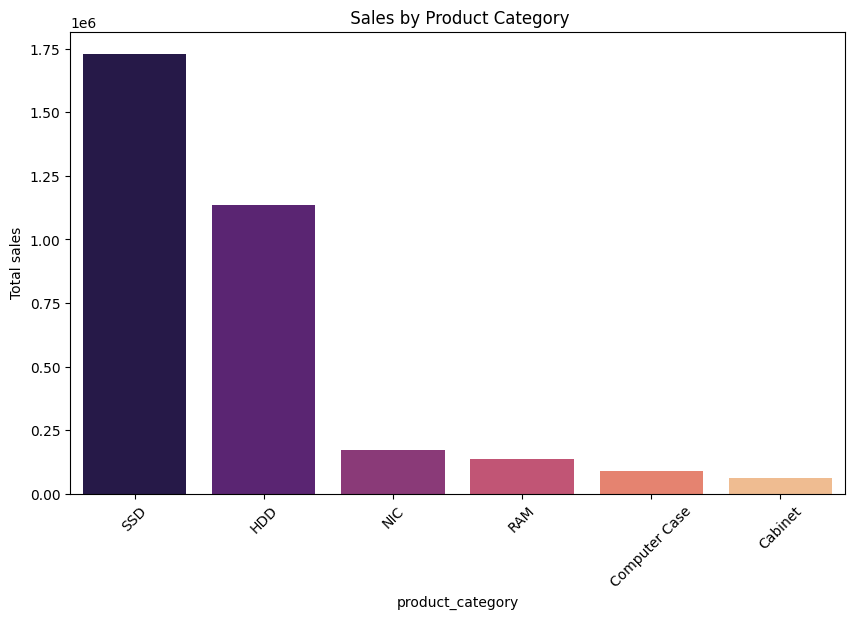

In [12]:
#Sales by product category

sales_by_category = df.groupby('product_category')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, hue=sales_by_category.index, palette='magma')
plt.title(' Sales by Product Category')
plt.xticks(rotation=45)
plt.ylabel('Total sales')
plt.show()

The sales by category graph clearly shows that SSD has the highest sales, followed by HDD. These two categories have notably higher sales than NIC, RAM, Computer Case, and Cabinet.

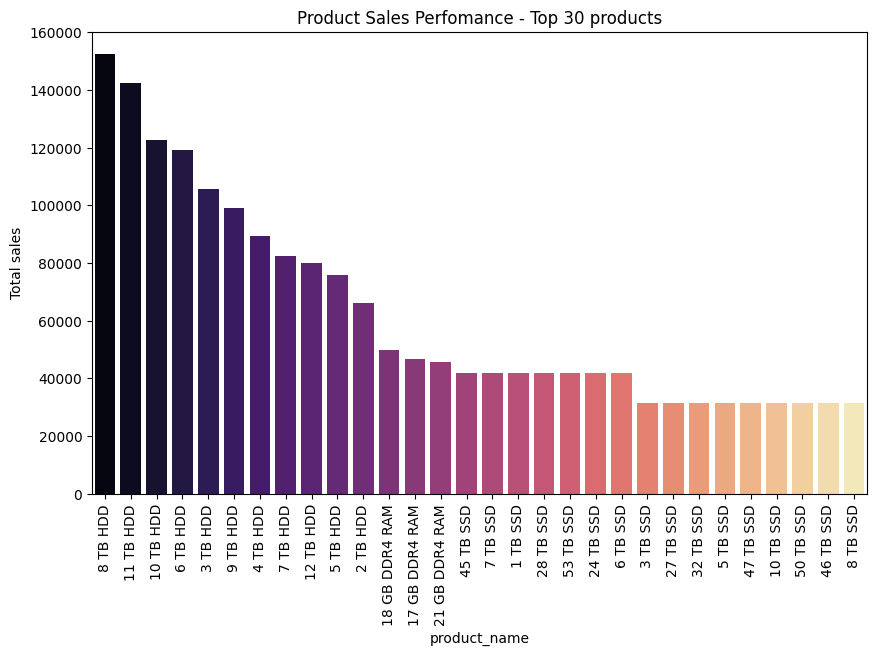

In [13]:
#Sales by product name

sales_by_name = df.groupby('product_name')['total_sales'].sum().sort_values(ascending=False).head(30)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_name.index, y=sales_by_name.values, hue=sales_by_name.index, palette='magma')
plt.title('Product Sales Perfomance - Top 30 products')
plt.xticks(rotation=90)
plt.ylabel('Total sales')
plt.show()

The product sales performance reveals that the top 11 products are all from the HDD category, which is surprising given that the previous graph showed SSD as the highest-selling product category. 

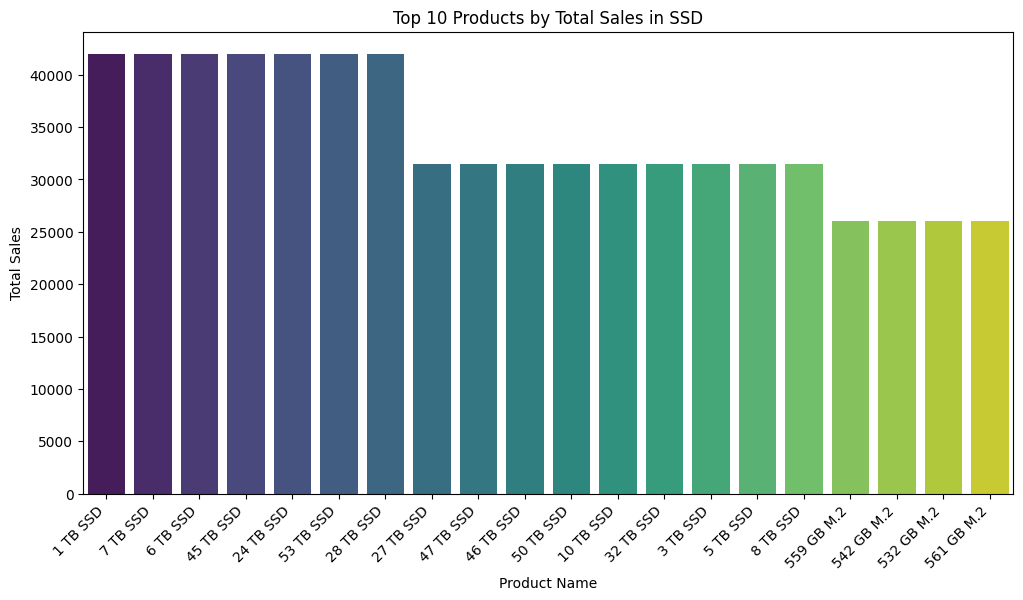

In [14]:
#Looking to see if the top products are in SSD since SSD has the highest sales category
category_name = 'SSD'
category_df = df[df['product_category'] == category_name]
sales_by_name_in_category = category_df.groupby('product_name')['total_sales'].sum().sort_values(ascending=False)
top_10_sales_by_name_in_category = sales_by_name_in_category.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_sales_by_name_in_category.index, y=top_10_sales_by_name_in_category.values, hue=top_10_sales_by_name_in_category.index, palette='viridis')
plt.title(f'Top 10 Products by Total Sales in {category_name}')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

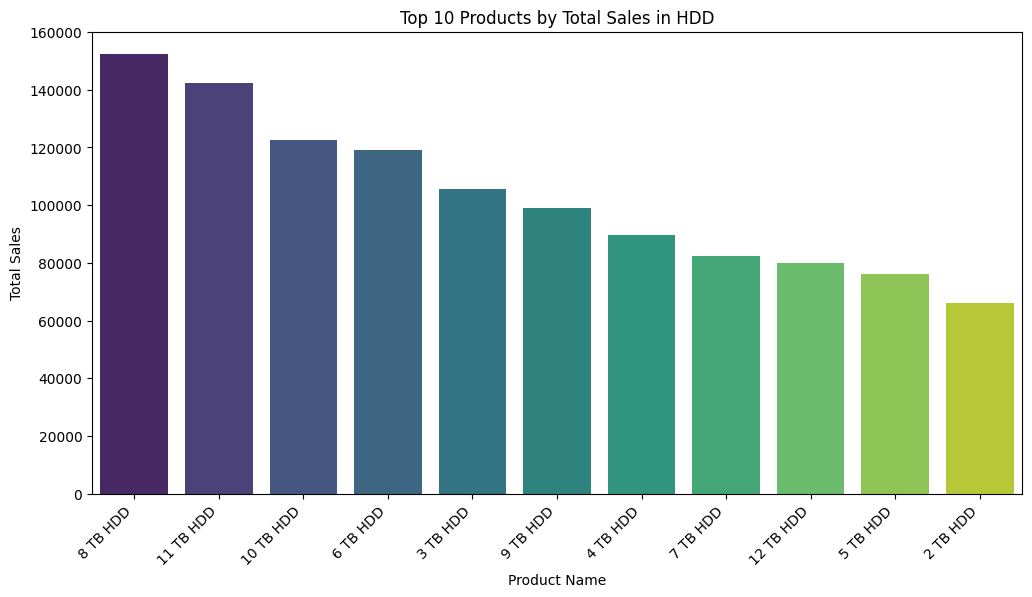

In [15]:
category_name = 'HDD'
category_df = df[df['product_category'] == category_name]
sales_by_name_in_category = category_df.groupby('product_name')['total_sales'].sum().sort_values(ascending=False)
top_10_sales_by_name_in_category = sales_by_name_in_category.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_sales_by_name_in_category.index, y=top_10_sales_by_name_in_category.values, hue=top_10_sales_by_name_in_category.index, palette='viridis')
plt.title(f'Top 10 Products by Total Sales in {category_name}')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

product_category
Cabinet           12
Computer Case      8
HDD               11
NIC               12
RAM               12
SSD              106
Name: product_name, dtype: int64


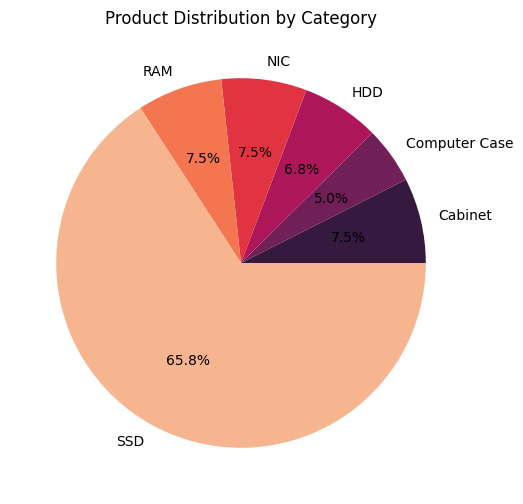

In [16]:
product_count_by_category = df.groupby('product_category')['product_name'].nunique()
print(product_count_by_category)

plt.figure(figsize=(10,6))
plt.pie(product_count_by_category, labels=product_count_by_category.index.astype(str), autopct='%1.1f%%', colors=sns.color_palette('rocket', len(product_count_by_category)))
plt.title('Product Distribution by Category')
plt.show()

By examining the top 10 sales per product in both SSD and HDD categories, it is evident that HDD has higher sales, ranging from approximately 80,000 to 140,000, despite selling significantly fewer products. In comparison, SSD, with sales between 28,000 and 40,000, sells over 20 products. 

This indicates that HDD products are actually performing better in terms of sales per product than SSD products. 

When I plotted the distribution of products by category, I found that SSD accounted for 65.8% of the total products in the dataset. This suggests that although SSD products may not perform as well individually, the category still contributes a substantial share of the overall sales.

#### Sales over time 

The goal is to examine how sales fluctuate over time by analyzing order dates.

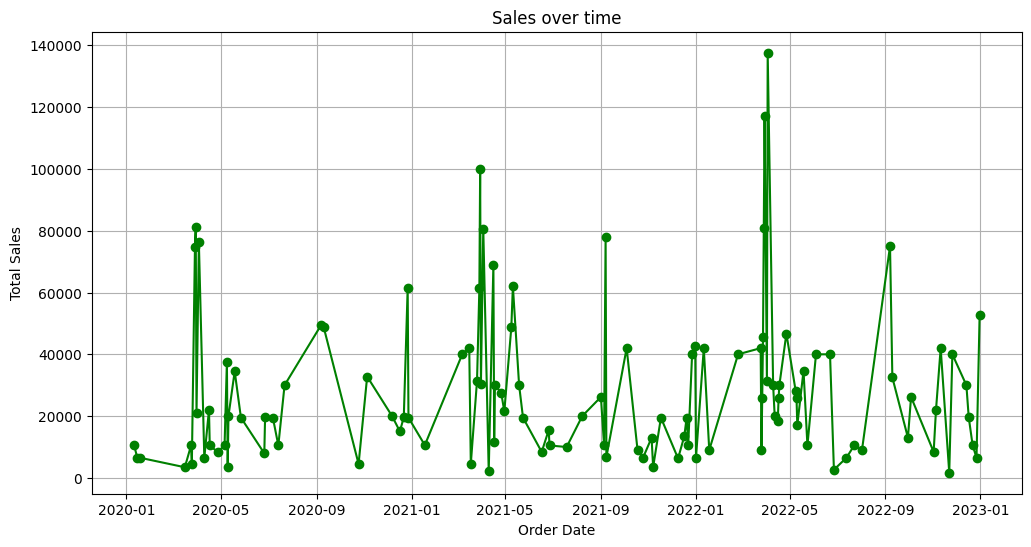

In [17]:
#Daily sales
df['order_date'] = pd.to_datetime(df['order_date'])

sales_by_date = df.groupby(df['order_date'].dt.date)['total_sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, marker='o', color='g')
plt.title('Sales over time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Based on the graph, it appears that most customers place orders early in the year, between March and May, with the second highest season for sales occurring around September. To better understand this trend, we need to analyze the data on a monthly basis.

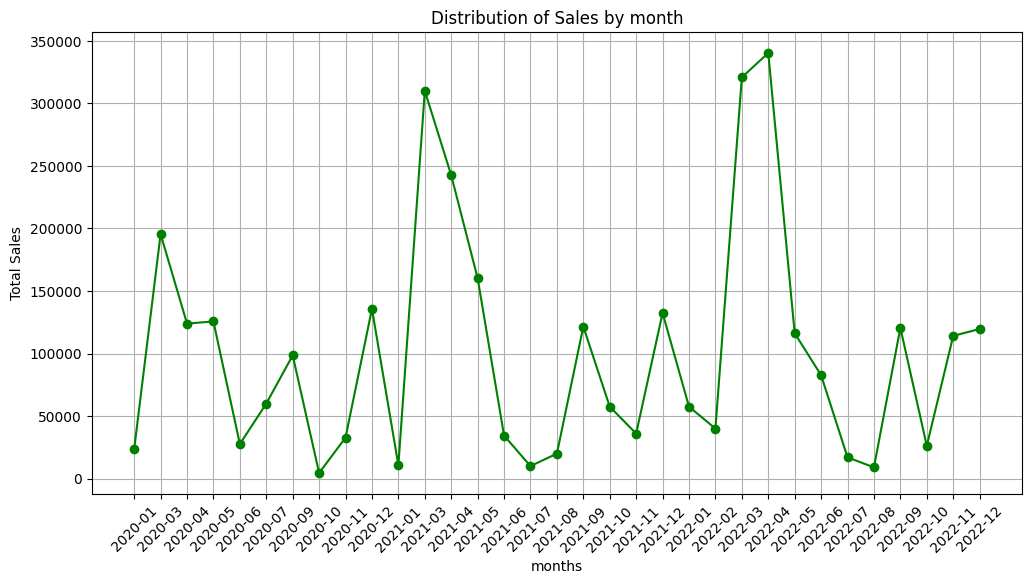

In [18]:
#monthly analysis
df['monthly_sales']=df['order_date'].dt.to_period('M')

sales_by_month = df.groupby('monthly_sales')['total_sales'].sum()

plt.figure(figsize=(12,6))
plt.plot(sales_by_month.index.astype(str), sales_by_month.values, marker='o', color='g')
plt.title('Distribution of Sales by month')
plt.xlabel('months')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In 2020 and 2021, Sales were highest in  February, in 2022 sales were highest in March. Top sales have aso been increasing steadily of the past 3 years. 

November has been the month with the second highest sales in all three years, followed closely by August. 

Based on monthly sales, it can be concluded that sales do the best in February, and March. 

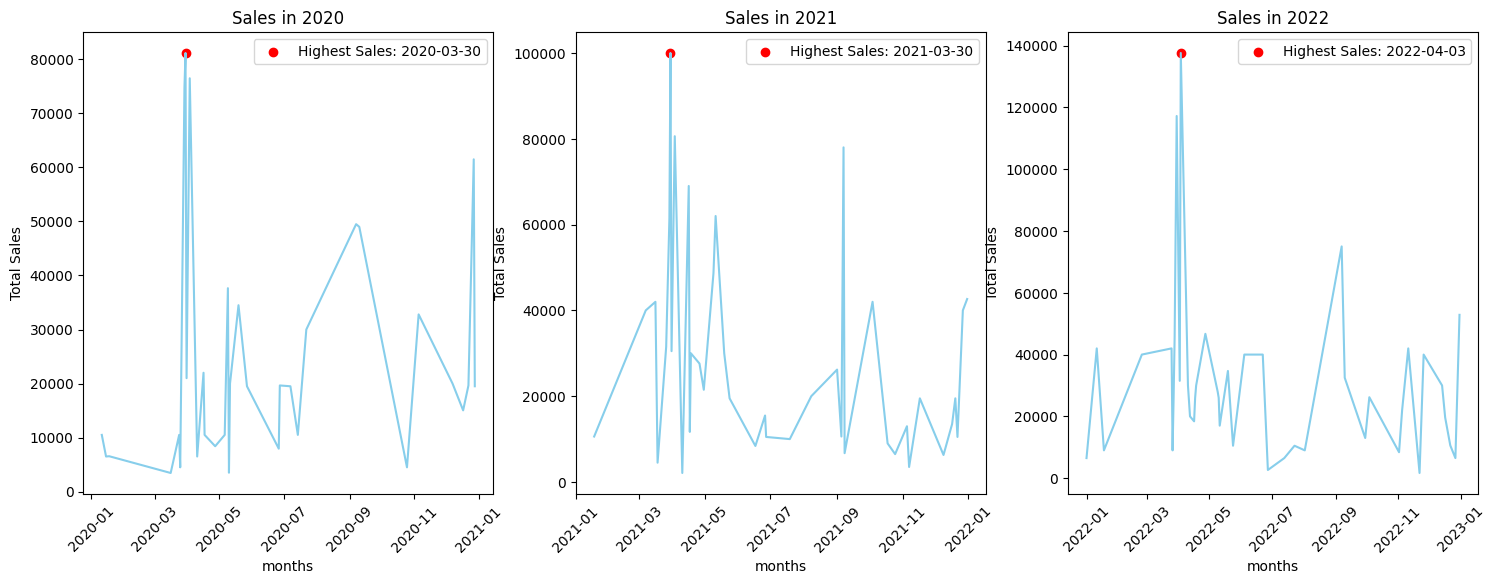

In [19]:
df['year'] = df['order_date'].dt.year

years = [2020, 2021, 2022]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, year in enumerate(years):
    # Filter data for the current year
    data_year = df[df['year'] == year]
    
    # Group by 'order_date' and sum the sales for each date
    sales_by_date = data_year.groupby('order_date')['total_sales'].sum()
    
    # Find the date with the highest sales
    highest_sales_date = sales_by_date.idxmax()
    highest_sales = sales_by_date.max()
    
    # Plot the sales over time for the current year
    sns.lineplot(x=sales_by_date.index, y=sales_by_date.values, ax=axes[i], color='skyblue')
    
    # Highlight the highest sales date
    axes[i].scatter(highest_sales_date, highest_sales, color='red', label=f'Highest Sales: {highest_sales_date.strftime("%Y-%m-%d")}')
    
    # Set title and labels
    axes[i].set_title(f'Sales in {year}')
    axes[i].set_xlabel("months")
    axes[i].set_ylabel('Total Sales')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend()


Analyzing sales by year reveals a clear trend that can assist in yearly planning. Understanding that products consistently perform best during certain times of the year can inform product release dates and marketing strategies.

From the yearly sales graph, it can be inferred that in 2023, the highest sales are likely to occur early in the year, particularly in February and March. November is expected to see the second-highest sales, while August also stands out with relatively strong sales. In contrast, sales tend to be lowest in January, June, July, and December.

#### Sales By Brand

Analyzing how sales vary by brand, which can help identify top performing brands.

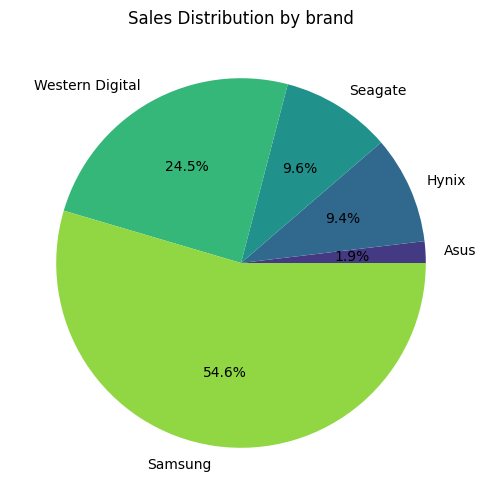

In [20]:
sales_by_brand = df.groupby('brand')['total_sales'].sum().sort_values(ascending=True)

plt.figure(figsize=(10,6))
plt.pie(sales_by_brand, labels=sales_by_brand.index.astype(str), autopct='%1.1f%%', colors=sns.color_palette('viridis', len(sales_by_brand)))
plt.title('Sales Distribution by brand')
plt.show()

Plotting sales by brand clearly highlights the top performers. Samsung is the highest-selling brand, accounting for 54.6% of total sales, followed by Western Digital with 24.5% and Seagate with 9.6%. These three brands dominate the market.

Samsung alone captures more than half of the total sales, significantly outperforming the other brands.

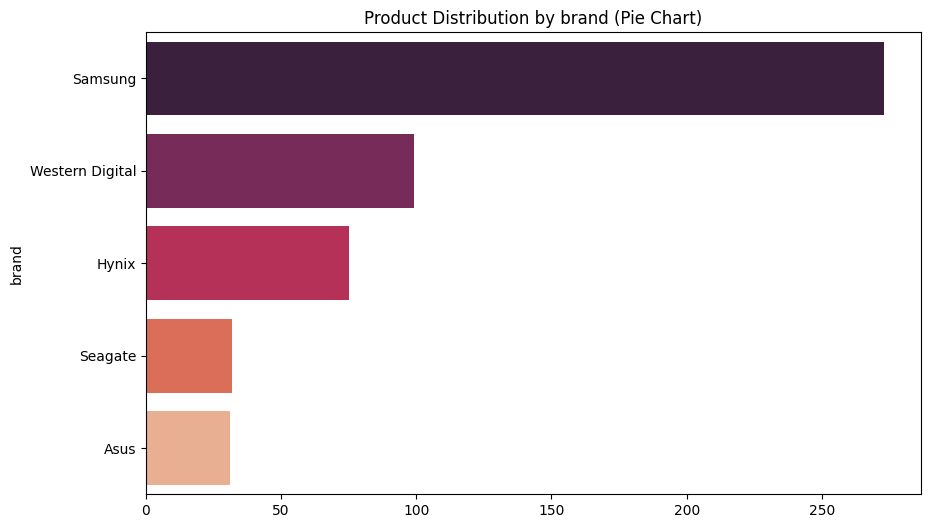

In [21]:
#products sold by brand
products_sold_by_brand = df.groupby('brand')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=products_sold_by_brand.values, y=products_sold_by_brand.index.astype(str), hue = products_sold_by_brand.index , palette = ('rocket'))
plt.title('Product Distribution by brand (Pie Chart)')
plt.show()

Examining the number of products sold by each brand provides valuable insight into how sales are distributed across different brands. Samsung leads the pack, selling over 250 products, which is significantly higher than any other brand in the dataset. This high volume of products sold likely contributes to Samsung's dominance in total sales, as more products sold naturally result in higher overall revenue. 

####  Distribution of Order Quantities and Product Prices

Analyzing the distribution of order quantities and product prices using histograms to spot trends or potential outliers

In [22]:
df.head()

,Customer_Id,Customer_Name,order_date,quantity,product_id,product_category,product_price,product_name,order_id,brand,Sales,total_sales,monthly_sales,year
0,1,Adhir Samal,2020-01-11,1,512,SSD,10500.0,41 TB SSD,139374,Samsung,8450,10500.0,2020-01,2020
1,11,Rhushikesh Mane,2020-01-15,1,1,SSD,6500.0,512 GB M.2,139384,Samsung,13650,6500.0,2020-01,2020
2,14,Haridas Balraj,2020-01-18,1,4,RAM,6550.0,16 GB DDR4 RAM,139387,Hynix,2184,6550.0,2020-01,2020
3,96,Haridas Balraj,2020-03-16,3,6,Cabinet,1150.0,Compact with 1 Fan,139471,Asus,2730,3450.0,2020-03,2020
4,125,Adhir Samal,2020-03-24,1,260,SSD,10500.0,20 TB SSD,139500,Samsung,5850,10500.0,2020-03,2020


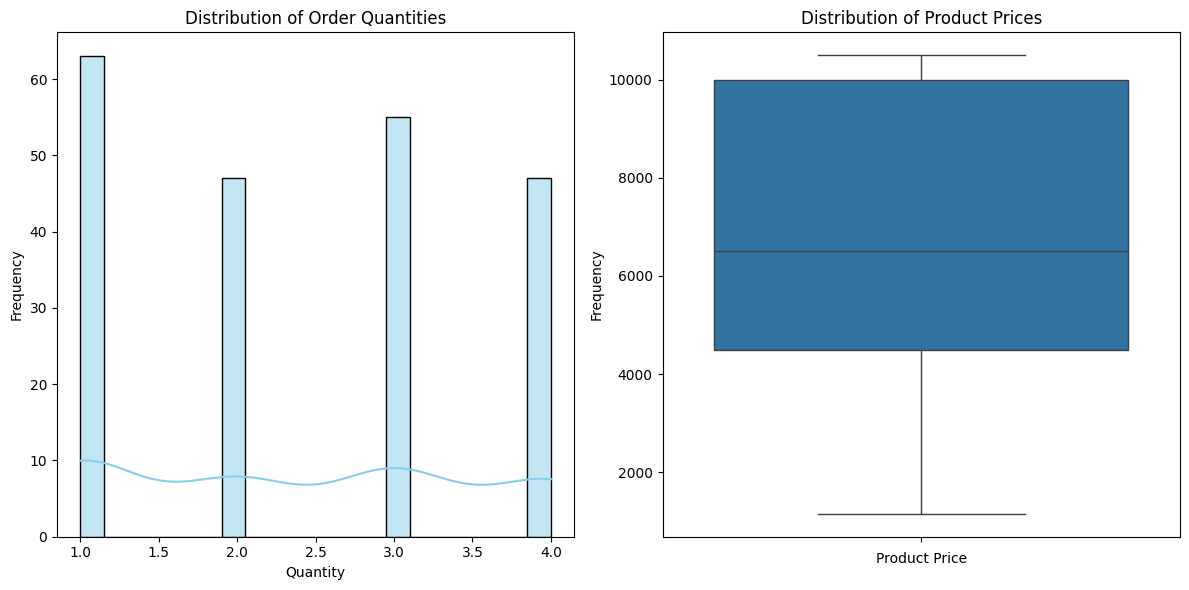

In [23]:
fig,axes = plt.subplots(1,2,figsize=(12,6))


# Distribution of quantities ordered
sns.histplot(df['quantity'], kde=True,  bins=20, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Order Quantities')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Frequency')

# Distribution of product prices
sns.boxplot(data=df['product_price'])
axes[1].set_title('Distribution of Product Prices')
axes[1].set_xlabel('Product Price')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the distribution quantities, we can conclude that over 60 people placed a single order, while the second most common order quantity is 3, with approximately 55 people ordering three times. Around 45 people ordered twice, and another 45 people ordered four times.

The boxplot indicates that the majority of products sold were priced between 4,200 and 10,000, with some products selling for as low as under 1,000 and a few reaching prices around 11,000. 

Knowing most customers order once or three times allows for targeted marketing to encourage repeat purchases. The boxplothelps in guiding pricing and inventory decisions. Stocking items within this price range could maximize revenue, while understanding outliers helps refine product offerings.


#### Correlation between Sales and Other variables

Visualizing the relationship between sales and other numeric variables like quantity and product price using a heatmaps

In [24]:
df.head()

,Customer_Id,Customer_Name,order_date,quantity,product_id,product_category,product_price,product_name,order_id,brand,Sales,total_sales,monthly_sales,year
0,1,Adhir Samal,2020-01-11,1,512,SSD,10500.0,41 TB SSD,139374,Samsung,8450,10500.0,2020-01,2020
1,11,Rhushikesh Mane,2020-01-15,1,1,SSD,6500.0,512 GB M.2,139384,Samsung,13650,6500.0,2020-01,2020
2,14,Haridas Balraj,2020-01-18,1,4,RAM,6550.0,16 GB DDR4 RAM,139387,Hynix,2184,6550.0,2020-01,2020
3,96,Haridas Balraj,2020-03-16,3,6,Cabinet,1150.0,Compact with 1 Fan,139471,Asus,2730,3450.0,2020-03,2020
4,125,Adhir Samal,2020-03-24,1,260,SSD,10500.0,20 TB SSD,139500,Samsung,5850,10500.0,2020-03,2020


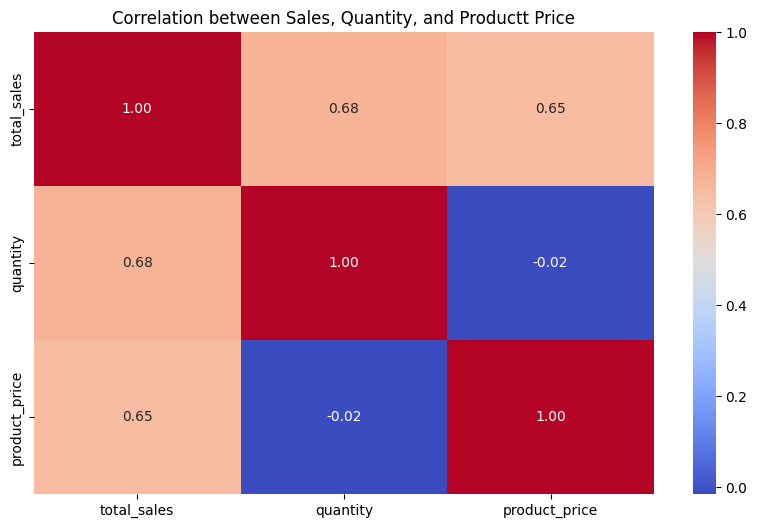

In [25]:
corr = df[['total_sales', 'quantity','product_price']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Sales, Quantity, and Productt Price')
plt.show()

The heat map reveals that there is no correlation between quantity and product price, a moderate correlation of 68% between quantity and total sales, and a 65% correlation between product price and total sales. 

This information highlights which factors have a stronger relationship with total sales, guiding business decisions. The moderate correlation between quantity and total sales suggests that increasing order quantities could positively impact overall revenue. Meanwhile, the correlation between product price and total sales indicates that higher-priced items contribute to revenue but aren't the sole driver of sales, showing a balance between quantity and pricing strategies to maximize sales. Understanding these relationships can help in adjusting pricing, marketing, and inventory management strategies to drive sales effectively.

## Advanced Analysis

#### Top Customers By Total Sales

Identify your top customers by total sales. This is useful for targeted marketing or sales strategies.


In [26]:
df.head()

,Customer_Id,Customer_Name,order_date,quantity,product_id,product_category,product_price,product_name,order_id,brand,Sales,total_sales,monthly_sales,year
0,1,Adhir Samal,2020-01-11,1,512,SSD,10500.0,41 TB SSD,139374,Samsung,8450,10500.0,2020-01,2020
1,11,Rhushikesh Mane,2020-01-15,1,1,SSD,6500.0,512 GB M.2,139384,Samsung,13650,6500.0,2020-01,2020
2,14,Haridas Balraj,2020-01-18,1,4,RAM,6550.0,16 GB DDR4 RAM,139387,Hynix,2184,6550.0,2020-01,2020
3,96,Haridas Balraj,2020-03-16,3,6,Cabinet,1150.0,Compact with 1 Fan,139471,Asus,2730,3450.0,2020-03,2020
4,125,Adhir Samal,2020-03-24,1,260,SSD,10500.0,20 TB SSD,139500,Samsung,5850,10500.0,2020-03,2020


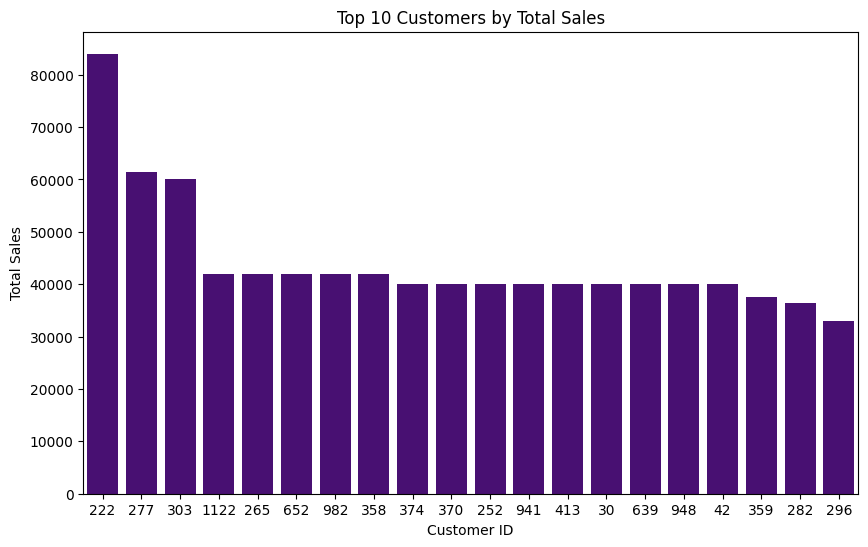

In [27]:
# Group by customer id and sales
top_customers = df.groupby('Customer_Id')['total_sales'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, color='indigo')
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.show()

In [28]:
# Looking for customer
customer_name = 'Haridas Balraj' 

customer_row = df.loc[df['Customer_Name'] == customer_name]

print(customer_row)

     Customer_Id   Customer_Name order_date  quantity  product_id  \
2             14  Haridas Balraj 2020-01-18         1           4   
3             96  Haridas Balraj 2020-03-16         3           6   
63            56  Haridas Balraj 2021-03-29         1          58   
91           403  Haridas Balraj 2021-04-26         3          82   
152          403  Haridas Balraj 2022-03-30         1         121   

    product_category  product_price        product_name  order_id  \
2                RAM         6550.0      16 GB DDR4 RAM    139387   
3            Cabinet         1150.0  Compact with 1 Fan    139471   
63               HDD         6500.0            4 TB HDD    141277   
91               RAM         2650.0      12 GB DDR4 RAM    141907   
152              NIC         3500.0      16 GB DDR4 RAM    143209   

               brand  Sales  total_sales monthly_sales  year  
2              Hynix   2184       6550.0       2020-01  2020  
3               Asus   2730       3450.0    

Noticed, that customer has mulitple purchases and IDs, further research needed.

We need to sum up all purchases by each customer name to get the correct top customers. 

In [29]:
# Group by Customer_ID and Customer_Name, summing the quantity for each customer
top_customers = df.groupby(['Customer_Id', 'Customer_Name'])['quantity'].sum().sort_values(ascending=False).head(10)

print(f"Top customer by total quantity purchased:{top_customers}")


Top customer by total quantity purchased:Customer_Id  Customer_Name        
286          Rajesh Variya            9
222          Ashwini Adsare           8
359          Kranti Bheke             7
277          Kundan Kumar             7
289          Jignesh Mhatre           6
303          Ranjeet Kumar            6
282          Ajay Sharma              5
283          Moinuddin Saifi          5
390          Bijendra                 5
291          Mohammed Abdul Kaleem    5
Name: quantity, dtype: int64


We now have a list of top 20 customers across the data. It would be insightful to see what products they are purchasing. 

In [30]:
df.head()

,Customer_Id,Customer_Name,order_date,quantity,product_id,product_category,product_price,product_name,order_id,brand,Sales,total_sales,monthly_sales,year
0,1,Adhir Samal,2020-01-11,1,512,SSD,10500.0,41 TB SSD,139374,Samsung,8450,10500.0,2020-01,2020
1,11,Rhushikesh Mane,2020-01-15,1,1,SSD,6500.0,512 GB M.2,139384,Samsung,13650,6500.0,2020-01,2020
2,14,Haridas Balraj,2020-01-18,1,4,RAM,6550.0,16 GB DDR4 RAM,139387,Hynix,2184,6550.0,2020-01,2020
3,96,Haridas Balraj,2020-03-16,3,6,Cabinet,1150.0,Compact with 1 Fan,139471,Asus,2730,3450.0,2020-03,2020
4,125,Adhir Samal,2020-03-24,1,260,SSD,10500.0,20 TB SSD,139500,Samsung,5850,10500.0,2020-03,2020


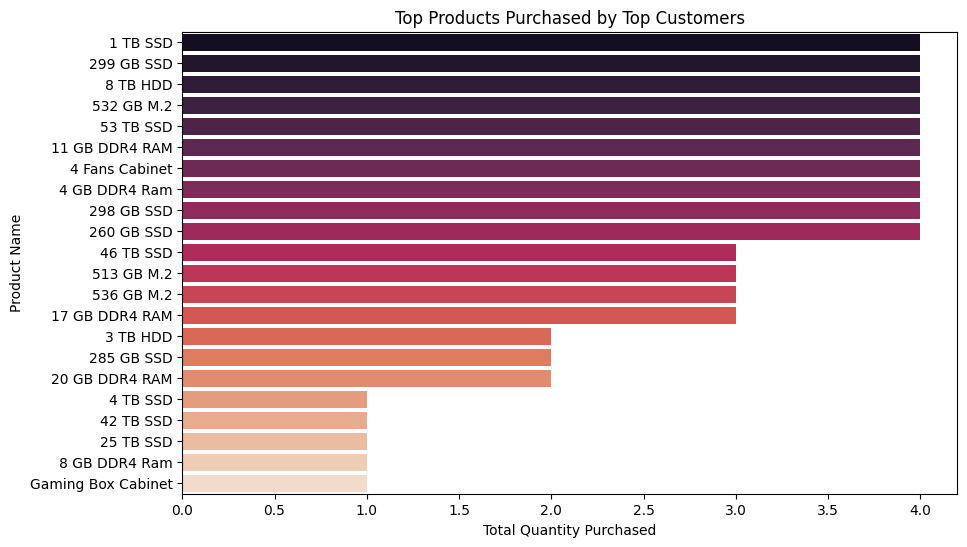

In [31]:
top_customer_ids = top_customers.index.get_level_values('Customer_Id')

# Step 2: Filter the dataset to include only rows for this top customer(s)
top_customer_data = df[df['Customer_Id'].isin(top_customer_ids)]

# Step 3: Find the top products purchased by this customer group
top_products = top_customer_data.groupby('product_name')['quantity'].sum().sort_values(ascending=False)

# Step 4: Plot the top products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette="rocket")
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Product Name')
plt.title('Top Products Purchased by Top Customers')
plt.show()

From analyzing the **top 20 customers**, we now have insights into the **top products** that they purchase the most. This is a crucial finding because it indicates which products are consistently favored by high-value customers, offering us an opportunity to understand their preferences. 

It can be concluded that these top products are likely of **high quality**, which has led to **repeated purchases** and **strong customer loyalty**. These products could possess certain features, performance, or attributes that resonate well with customers, driving them to purchase more frequently or in larger quantities.

Additionally, the consistent purchasing behavior suggests that these products not only meet immediate needs but also provide ongoing satisfaction, prompting customers to return.  

By identifying these products, the company could focus on **improving marketing strategies**, ensuring **availability**, and potentially even introducing new versions or accessories that complement these top products, to further boost customer engagement and sales. 

In summary, the top products purchased by the top 20 customers reflect not just high-quality offerings but also the **brand’s ability to meet customer needs consistently**, reinforcing the importance of maintaining high standards in product quality and customer satisfaction.

#### Product Performance

Identifying which products are underperfoming or overperforming based on sales

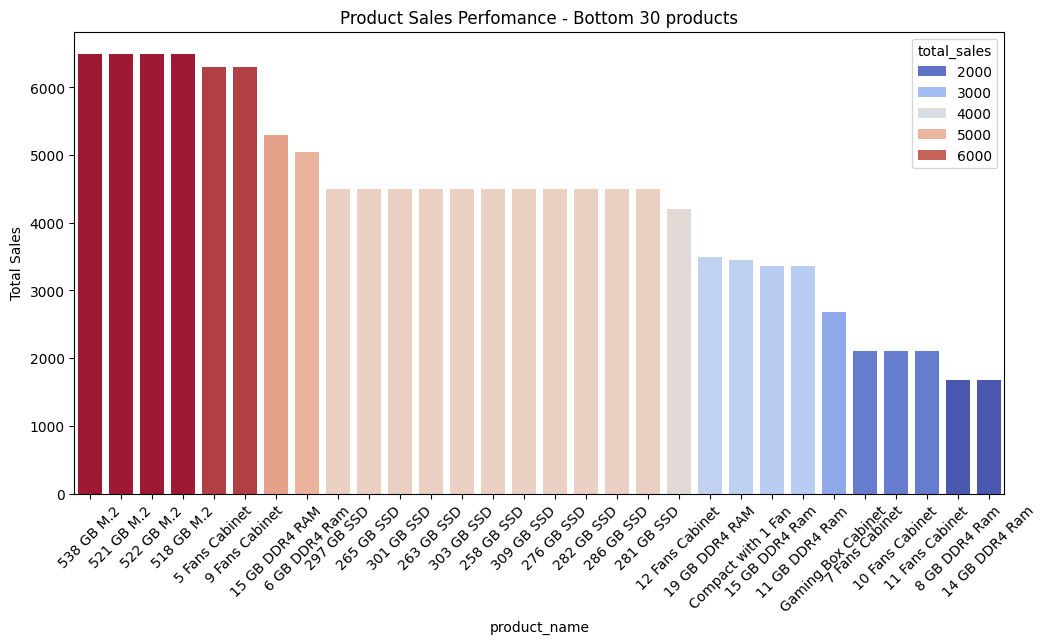

In [32]:
#Lowest Sales by product name

lowest_product_performance = df.groupby('product_name')['total_sales'].sum().sort_values(ascending=False).tail(30)

plt.figure(figsize=(12, 6))
sns.barplot(x=lowest_product_performance.index, y=lowest_product_performance.values, hue=lowest_product_performance, palette='coolwarm')
plt.title('Product Sales Perfomance - Bottom 30 products')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()


## Conclusion

Top selling categories  - 

Trends Over time - 

Customer insights - 

Pricing Insights - 

Product_level Analysis - 